# Wrangle and Analyze Data

## Gather Data

In [1]:
# Import libs
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### Gather the archive data

In [2]:
# Load the WeRateDog archive data (CSV)
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Gather the image prediction data

In [3]:
# Request url
image_pred_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# Request the image prediction data from the internet
response = requests.get(image_pred_url)
image_pred_file_name = "image-predictions.tsv"
# Write to file from the response content
with open(image_pred_file_name, mode='wb') as file:
    file.write(response.content)
# Load the saved file to dataframe    
image_pred = pd.read_csv(image_pred_file_name, sep='\t')    

### Gather the tweet json data

In [4]:
# Get twitter API keys, saved in the tweet_key.json
# Keys should include: 'consumer_key', 'consumer_secret', 'access_token', 'access_token_secret'
with open('other/tweet_key.json') as keyfile:
    tweet_key = json.load(keyfile)
print(tweet_key.keys())

dict_keys(['consumer_key', 'consumer_secret', 'access_token', 'access_token_secret'])


In [5]:
# Initialize Tweepy API
auth = tweepy.OAuthHandler(tweet_key['consumer_key'], tweet_key['consumer_secret'])
auth.set_access_token(tweet_key['access_token'], tweet_key['access_token_secret'])
# Set the rate_limit related params
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# Test the api call with tweepy
test = api.get_status(886054160059072513) # tweet_id = 888202515573088257
print(test._json)

{'created_at': 'Sat Jul 15 02:45:48 +0000 2017', 'id': 886054160059072513, 'id_str': '886054160059072513', 'text': 'RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo', 'truncated': False, 'entities': {'hashtags': [{'text': 'BATP', 'indices': [21, 26]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Athletics', 'name': 'Oakland Athletics 🌳🐘⚾️', 'id': 19607400, 'id_str': '19607400', 'indices': [3, 13]}], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [27, 50]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '⇩ merch ⇩         DM YOUR DO

In [7]:
# Display the included tweet data
print(test._json.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


**Get Json data by tweepy API call**  
1. Define lists to stored queried tweet_id. One list store the successfully queried tweet_id, Another list store the failed queried tweet_id. Store the two lists in the IPython database.
2. Define a function to extract data by tweet_id in the twitter_archive dataframe through tweepy API and store data in the tweet_json.txt. 
3. After the first run of the function above, skip excuting again by adding `if 1==0:` at the begining.

In [8]:
# Define a list to store the tweet_id when queried successfully
queried_tweet_ids=[]
# Define a list to store the tweet_id when query encounters exception
exception_tweet_ids=[]

In [9]:
# Extract all tweet's data based on the tweet_id in the twet_arch, and store in json file: tweet_json.txt
# Define a function to get data
def extractData():
    # Define timer to get the consuming time of the tweepy API request
    # Time begin
    start = time.time()
    # Open file as write and append mode
    with open('tweet_json.txt', mode='w+') as tweet_json:
        # Loop the tweet_id and query the data
        for tid in twitter_archive['tweet_id']:
            try:
                # API call to get tweet data
                data = api.get_status(tid)
                # add the newline character for each request
                tweet_json.write(json.dumps(data._json)+'\n')
                # Add the tweet_id which can get data successfully 
                queried_tweet_ids.append(tid)
            except tweepy.RateLimitError as re:
                exception_tweet_ids.append(tid)
                print(e)
                continue
            except tweepy.TweepError as e:
                exception_tweet_ids.append(tid)
                print(e)
                continue
    # Time end
    end = time.time()
    # The consuming time
    print(end - start)   

In [10]:
# As the time and resource comsuming of getting data, skip this cell execution after getting the json data on the first time
# Remove the if 1==0: to resume
if 1==0:
    extractData();
    # Store the lists
    %store queried_tweet_ids
    %store exception_tweet_ids 
# Print the tweet_id which have no status info
# There are no values in the exception_tweet_ids and queried_tweet_ids lists,
# as the store functions are updated features after the initial run
exception_tweet_ids    

[]

In [11]:
# Read data from the saved json file
tweet_json = pd.read_json('tweet_json.txt',lines=True)

## Access Data

### Wangle the WeRateDogs archive data

In [12]:
# Wangle the WeRateDogs archive data
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
# Check the original data info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Show all doggo values
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
# Show all floofer values
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
# Show all pupper values
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
# Show all puppo values
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
# Show all retweeted_status_user_id that is not NaN 
twitter_archive[twitter_archive['retweeted_status_user_id'].isna()==False].retweeted_status_user_id.astype(np.int64).value_counts()

4196983835            156
4296831739              2
41198418                1
66699013                1
712457247234756608      1
1228325660              1
280479778               1
154767397               1
787461778435289088      1
487197737               1
24885566                1
363890752               1
747554344434831360      1
79923701                1
19607400                1
44667502                1
783214                  1
811740824               1
512804507               1
195036846               1
597064155               1
341021133               1
58709723                1
726634734               1
1732729088              1
Name: retweeted_status_user_id, dtype: int64

In [19]:
# Show all in_reply_to_user_id that is not NaN 
twitter_archive[twitter_archive['in_reply_to_user_id'].isna()==False].in_reply_to_user_id.astype(np.int64).value_counts()

4196983835            47
21955058               2
26259576               1
30582082               1
21435658               1
113211856              1
16374678               1
194351775              1
2281181600             1
467036706              1
77596200               1
1582853809             1
840547864354918400     1
730505014150582272     1
15846407               1
291859009              1
4717297476             1
180670967              1
20683724               1
28785486               1
16487760               1
11856342               1
1198988510             1
279280991              1
358972768              1
29166305               1
2319108198             1
3105440746             1
2894131180             1
47384430               1
13615722               1
Name: in_reply_to_user_id, dtype: int64

From above, the user id of 4196983835 has the largest reply and retweet records. **Guess**, the 4196983835 is the user id of *@dog_rates*

In [20]:
# Get the user info of the user "@dog_rates", the screen name
dog_rates = api.get_user('dog_rates')
print(dog_rates._json)

{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '⇩ merch ⇩         DM YOUR DOGS', 'profile_location': None, 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/x186Z0Oljv', 'entities': {'url': {'urls': [{'url': 'https://t.co/x186Z0Oljv', 'expanded_url': 'https://weratedogs.com/', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 7420095, 'friends_count': 10, 'listed_count': 5468, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 139465, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 9149, 'lang': 'en', 'status': {'created_at': 'Mon Nov 12 01:03:51 +0000 2018', 'id': 1061786619634765824, 'id_str': '1061786619634765824', 'text': '@Evan_Siewert @ilyybianca i think it is @GWR', '

In [21]:
# Show all rating numerator values
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
# Show all rating denominator values
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
# Show the records of which the rating_denominator and rating_numerator are not make sense in terms of the rating system.
twitter_archive.query('rating_denominator!=10 | rating_numerator>20')[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
188,420,10
189,666,10
290,182,10
313,960,0
340,75,10
342,11,15
433,84,70
516,24,7
695,75,10
763,27,10


In [24]:
# Check values of the source columns
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
# Get all retweet id from retweeted_status_id
retweeted_status_id_list = twitter_archive[twitter_archive.retweeted_status_id.isnull()==False].retweeted_status_id.astype(np.int64)

In [26]:
# Check if the 'tweet_id' includes retweet data
twitter_archive[twitter_archive.tweet_id.isin(retweeted_status_id_list)].count()[0]

112

In [27]:
# Get all reply id from reply_status_id
reply_status_id_list = twitter_archive[twitter_archive.in_reply_to_status_id.isnull()==False].in_reply_to_status_id.astype(np.int64)

In [28]:
# Check if the 'tweet_id' includes 'reply-to' tweet data
twitter_archive[twitter_archive['tweet_id'].isin(reply_status_id_list)].count()[0]

33

### Wangle the image prediction data

In [29]:
# Wangle the image prediction data
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
# Check the image prediction data
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
# Show the p1's value list
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [32]:
# Show the image count
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [33]:
# Show the image urls for those tweet that have multiple images
image_pred[image_pred.img_num>1].jpg_url

144     https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg
312     https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg
315     https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg
319     https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg
345     https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg
381     https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg
382     https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg
410     https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg
441     https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg
452     https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg
454     https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg
478     https://pbs.twimg.com/media/CV9EvZNUwAAgLCK.jpg
479     https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg
494     https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg
511     https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg
517     https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg
530     https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg
531     https://pbs.twimg.com/media/CWSN-vaXAAA8

In [34]:
# Check if exist duplicated data
image_pred[image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Wangle the tweet_json.txt data

In [35]:
# Show tweet_json info
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2342 non-null bool
lang                             2342 no

In [36]:
# Show all values of source
tweet_json.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2207
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [37]:
# Show all values of language
tweet_json.lang.value_counts()

en     2324
und       7
nl        3
in        3
et        1
ro        1
eu        1
tl        1
es        1
Name: lang, dtype: int64

In [38]:
# Show properties of 'user' object 
tweet_json.iloc[0,].user.keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [39]:
# Show properties of 'entities' object 
tweet_json.iloc[0,].entities.keys()

dict_keys(['hashtags', 'symbols', 'user_mentions', 'urls', 'media'])

In [40]:
# Show all values of 'created' column
tweet_json.created_at.sort_values(ascending=True)

2341   2015-11-15 22:32:08
2340   2015-11-15 23:05:30
2339   2015-11-15 23:21:54
2338   2015-11-16 00:04:52
2337   2015-11-16 00:24:50
2336   2015-11-16 00:30:50
2335   2015-11-16 00:35:11
2334   2015-11-16 00:49:46
2333   2015-11-16 00:55:59
2332   2015-11-16 01:01:59
2331   2015-11-16 01:22:45
2330   2015-11-16 01:52:02
2329   2015-11-16 01:59:36
2328   2015-11-16 02:38:37
2327   2015-11-16 03:22:39
2326   2015-11-16 03:44:34
2325   2015-11-16 03:55:04
2324   2015-11-16 04:02:55
2323   2015-11-16 14:57:41
2322   2015-11-16 15:14:19
2321   2015-11-16 16:11:11
2320   2015-11-16 16:37:02
2319   2015-11-16 19:31:45
2318   2015-11-16 20:01:42
2317   2015-11-16 20:32:58
2316   2015-11-16 21:10:36
2315   2015-11-16 21:54:18
2314   2015-11-16 23:23:41
2313   2015-11-17 00:06:54
2312   2015-11-17 00:24:19
               ...        
29     2017-07-15 16:51:35
28     2017-07-15 23:25:31
27     2017-07-16 20:14:00
26     2017-07-16 23:58:41
25     2017-07-17 16:17:36
24     2017-07-18 00:07:08
2

### Some Problems of data
#### twitter_archive
- Tidiness
    - The categorical column of dog 'satge' are separated to different columns: doggo, floofer, pupper and puppo.
    - The rating_numerator and rating_denominator can be integrated as 'rating' columns.

- Quality
    - The columns of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id are float type.
    - Missing values for Dog stage (doggo,floofer,pupper,puppo) in some tweets.
    - Some tweets have multiple dog stages.
    - Unuseful columns (timestamp, retweeted_status_timestamp, expanded_urls)
    - The 'tweet_id' includes retweet information.
    - The 'tweet_id' includes reply information.
    - The 'source' column includes the http tag information(`<a href=''>XXX</a>`).
    - For some records, the rating_numerator are less than the rating_denominator.

#### image_pred
- Tidiness
    -  The prediction of dog breed names are not well formated (golden_retriever, Labrador_retriever, vizsla etc.)
- Quality
    - The data includes the prediction of non-dog types.
    - Include data that have multiple images.

#### tweet_json
- Quality
    - Extract wanted data.

## Clean

In [41]:
# Make copy of the original data
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
# Load the initially saved json data
tweet_json = pd.read_json('tweet_json.txt',lines=True)
tweet_json_clean = tweet_json.copy()

### Tidiness

#### Define Issue 1
1. Reshape the dataframe to merge doggo, floofer, pupper and puppo columns into one column (dog_stage).
2. Drop the 'variable' column, and then drop the duplicated rows.
3. Get the tweet_id which the dog_stage is not 'None', and then drop the rows which has the same tweet_id but the dog_stage is 'None'.
4. For records have multiple 'stage', just keep the first one.

#### Code

In [42]:
# Get the columns as the input id_vars in the melt function 
id_col=twitter_archive_clean.columns.tolist()[0:-4]
twitter_archive_clean = twitter_archive_clean.melt(id_vars=id_col, value_vars=['doggo','floofer','pupper','puppo'], value_name='dog_stage')
# Drop the useless column 'variable'
twitter_archive_clean.drop(columns=['variable'], inplace=True)

In [43]:
# Drop the duplicated rows
twitter_archive_clean.drop_duplicates(inplace=True)
# Get the tweet_id which the dog_stage column is not 'None'
filter_tweet_id = twitter_archive_clean[twitter_archive_clean['dog_stage']!='None'].tweet_id
# Get indicies of which the row also have 'None' value in dog_stage column from above filtered tweet_id
drop_index = twitter_archive_clean[(twitter_archive_clean['dog_stage']=='None') & twitter_archive_clean['tweet_id'].isin(filter_tweet_id)].index
# Drop the rows in the above indicies
twitter_archive_clean.drop(index=drop_index, inplace=True)

In [44]:
# Reset index
twitter_archive_clean.reset_index(drop=True, inplace=True)
# Drop the rows with duplicated tweet_id
twitter_archive_clean.drop_duplicates(subset='tweet_id', keep='first', inplace=True)

#### Test

In [45]:
# Check info
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2369
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 276.1+ KB


In [46]:
# Check duplicated data
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Define Issue 2
1. Remove data of which the rating_numerator is less than the rating_denominator based on the rating system.
2. Remove the data of which the rating_numerator is too large and not meaningful (420, 666 and 1776 etc.).
4. Create new column 'rating', which is equal to rating_numerator/rating_denominator.
5. Remove the old 'rating_numerator' and 'rating_denominator' columns.

#### Code

In [47]:
# Drop data of which the rating_numerator<rating_denominator or rating_denominator<=0
twitter_archive_clean.drop(
    twitter_archive_clean.query('rating_numerator<rating_denominator | rating_denominator<=0').index, inplace=True)

# Drop data of which rating_numerator is more that 2 times larger than the rating_denominator
# The too large rating is not meaningful
twitter_archive_clean.drop(twitter_archive_clean.query('rating_numerator/rating_denominator>=2').index, inplace=True)

# Create new column rating and rating=rating_numerator/rating_denominator
twitter_archive_clean['rating']=twitter_archive_clean.apply(lambda r: (r.rating_numerator/r.rating_denominator), axis=1)
# Round the ratings to keep just 1 decimal 
twitter_archive_clean['rating']=np.around(twitter_archive_clean['rating'], 1)

# Drop the old rating_numerator and rating_denominator columns
twitter_archive_clean.drop(columns=['rating_numerator','rating_denominator'], inplace=True)

#### Test

In [48]:
# Check all ratings
twitter_archive_clean.rating.value_counts()

1.2    563
1.1    469
1.0    463
1.3    351
1.4     54
1.5      2
1.7      1
Name: rating, dtype: int64

#### Define Issue 3
Capitalize the predition name in image_pred

#### Code

In [49]:
# Capitalize the every prediction values
image_pred_clean.p1 = image_pred_clean.p1.apply(lambda r:r.capitalize())
image_pred_clean.p2 = image_pred_clean.p2.apply(lambda r:r.capitalize())
image_pred_clean.p3 = image_pred_clean.p3.apply(lambda r:r.capitalize())

#### Test

In [50]:
# Check samples
image_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,Prison,0.352793,False,Dishwasher,0.110723,False,File,0.094112,False
1069,716080869887381504,https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg,1,Golden_retriever,0.638625,True,Chow,0.254717,True,Tibetan_mastiff,0.071732,True
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
741,687317306314240000,https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg,1,Shih-tzu,0.747208,True,Maltese_dog,0.091025,True,Lhasa,0.035788,True
407,673709992831262724,https://pbs.twimg.com/media/CVl_qbjW4AA8Mam.jpg,1,Chihuahua,0.330171,True,Siamese_cat,0.181580,False,Kelpie,0.178227,True


### Quality

#### Define Issue 1
1. Fill the NA values in columns of in_reply_to_status_id and retweeted_status_id as 0.
2. Convert the columns to np.int64

#### Code

In [51]:
# Fill the NA values as 0 for column in_reply_to_status_id
twitter_archive_clean.in_reply_to_status_id.fillna(0, inplace=True)
# Fill the NA values as 0 for column retweeted_status_id
twitter_archive_clean.retweeted_status_id.fillna(0, inplace=True)

In [52]:
# Convert the in_reply_to_status_id column type as int64
twitter_archive_clean.in_reply_to_status_id.astype(np.int64)
# Convert the retweeted_status_id column type as int64
twitter_archive_clean.retweeted_status_id.astype(np.int64)

0                        0
1                        0
2                        0
3                        0
4                        0
5                        0
6                        0
7                        0
8                        0
9                        0
10                       0
11                       0
12                       0
13                       0
14                       0
15                       0
16                       0
17      887473957103951872
18                       0
19                       0
20                       0
21                       0
22                       0
23                       0
24                       0
25                       0
26                       0
27                       0
28                       0
29      886053734421102592
               ...        
2336                     0
2337                     0
2340                     0
2341                     0
2342                     0
2343                     0
2

#### Test

In [53]:
# Check info
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 2369
Data columns (total 13 columns):
tweet_id                      1903 non-null int64
in_reply_to_status_id         1903 non-null float64
in_reply_to_user_id           61 non-null float64
timestamp                     1903 non-null object
source                        1903 non-null object
text                          1903 non-null object
retweeted_status_id           1903 non-null float64
retweeted_status_user_id      171 non-null float64
retweeted_status_timestamp    171 non-null object
expanded_urls                 1859 non-null object
name                          1903 non-null object
dog_stage                     1903 non-null object
rating                        1903 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 208.1+ KB


#### Define Issue 2
Remove the unuseful columns (timestamp, retweeted_status_timestamp, expanded_urls)

#### Code

In [54]:
# Drop timestamp column
twitter_archive_clean.drop(['timestamp'], axis=1, inplace=True)
# Drop retweeted_status_timestamp column
twitter_archive_clean.drop(['retweeted_status_timestamp'], axis=1, inplace=True)
# Drop expanded_urls column
twitter_archive_clean.drop(['expanded_urls'], axis=1, inplace=True)

#### Test

In [55]:
# Check the info
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 2369
Data columns (total 10 columns):
tweet_id                    1903 non-null int64
in_reply_to_status_id       1903 non-null float64
in_reply_to_user_id         61 non-null float64
source                      1903 non-null object
text                        1903 non-null object
retweeted_status_id         1903 non-null float64
retweeted_status_user_id    171 non-null float64
name                        1903 non-null object
dog_stage                   1903 non-null object
rating                      1903 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 163.5+ KB


#### Define Issue 3
1. Find the dog stage(doggo, floofer, pupper and puppo) from the tweet text by regexp.
2. Assign the value to the dog_stage column

#### Code

In [56]:
# Define the stages' key words tuple
stages = ('doggo', 'floofer', 'pupper', 'puppo')
# Find if the text conatains the above key words. If exist, assgin the key word to the stage column
for i, row in twitter_archive_clean.iterrows():
    for s in stages:
        if s in row['text'].lower():
            twitter_archive_clean.loc[i,'dog_stage']=s
            break

#### Test

In [57]:
# Check info
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 2369
Data columns (total 10 columns):
tweet_id                    1903 non-null int64
in_reply_to_status_id       1903 non-null float64
in_reply_to_user_id         61 non-null float64
source                      1903 non-null object
text                        1903 non-null object
retweeted_status_id         1903 non-null float64
retweeted_status_user_id    171 non-null float64
name                        1903 non-null object
dog_stage                   1903 non-null object
rating                      1903 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 243.5+ KB


In [58]:
# Check the stage data
twitter_archive_clean.dog_stage.value_counts()

None       1537
pupper      222
doggo       100
puppo        35
floofer       9
Name: dog_stage, dtype: int64

#### Define Issue 4
Extract the inner text from the <a></a> tag as the new value in the 'source' column.

#### Code

In [59]:
# Define pattern of the <a></a> tags
src_pat='</?(a|A).*?>'
# Replace the <a></a> tags with empty string
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(pat=src_pat, repl='')

#### Test

In [60]:
# Check the soure column
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1789
Vine - Make a Scene      84
Twitter Web Client       21
TweetDeck                 9
Name: source, dtype: int64

#### Define Issue 5
Drop rows which their retweeted_status_id value exists in the value of tweet_id column

#### Code

In [61]:
# Get index which the tweet is from a retweet and the origin tweet is already included.
reteet_duplicate_index = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isin(twitter_archive_clean.tweet_id)].index
# Drop data by the index 
twitter_archive_clean.drop(index=reteet_duplicate_index, inplace=True)

In [62]:
len(reteet_duplicate_index)

147

#### Test

In [63]:
# Check if exist duplicate tweet_id that both included in tweet_id and retweeted_status_id
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isin(twitter_archive_clean.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,name,dog_stage,rating


#### Define Issue 6
Drop rows which their in_reply_to_status_id value exist in the value of tweet_id column

#### Code

In [64]:
# Get index which the tweet is from a replied tweet and the origin tweet is already included.
reply_duplicate_index = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isin(twitter_archive_clean.tweet_id)].index
# Drop data by the index 
twitter_archive_clean.drop(index=reply_duplicate_index, inplace=True)

#### Test

In [65]:
# Check if exist duplicate tweet_id that both included in tweet_id and in_reply_to_status_id
twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isin(twitter_archive_clean.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,name,dog_stage,rating


#### Define Issue 7
Drop unuseful columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id

#### Code

In [66]:
# Drop the unuseful columns after checking the duplicated tweet id: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
twitter_archive_clean.drop(
    columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'], 
    inplace=True)

#### Test

In [67]:
# Check info
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 2369
Data columns (total 6 columns):
tweet_id     1728 non-null int64
source       1728 non-null object
text         1728 non-null object
name         1728 non-null object
dog_stage    1728 non-null object
rating       1728 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.5+ KB


In [68]:
# Check samples
twitter_archive_clean.sample(5)

,tweet_id,source,text,name,dog_stage,rating
1859,669972011175813120,Twitter for iPhone,Here we see really big dog cuddling smaller do...,None,None,1.0
194,851464819735769094,Twitter for iPhone,This is Iggy. He was a rescue dog killed in th...,Iggy,None,1.4
100,870656317836468226,Twitter for iPhone,This is Cody. He zoomed too aggressively and t...,Cody,None,1.3
2276,681694085539872773,Twitter for iPhone,This is Bo. He's a Benedoop Cumbersnatch. Seem...,Bo,pupper,1.1
1115,710844581445812225,Twitter for iPhone,This is Staniel. His selfie game is strong af....,Staniel,None,1.0


#### Define Issue 8
Drop rows of which the image number is greater than 1.

#### Code

In [69]:
# Drop rows of which the image number is greater than 1
image_pred_clean.drop(image_pred_clean.query('img_num>1').index, inplace=True)

#### Test

In [70]:
# Show all img_num values
image_pred_clean.img_num.value_counts()

1    1780
Name: img_num, dtype: int64

#### Define Issue 9
Filter the image_pred and just keep the records which is predicted as dog.
1. Drop rows in which the 'p1_dog', 'p2_dog' and 'p3_dog' are all false.
2. Create new dataframe image_pred_clean with columns 'tweet_id','pred_breed' and 'pred_score', to store the predicted dog breed and prediction score.
3. For each row in original image_pred data, find the highest p{N}_config (where N=1,2 or 3) along with its p{N} where the p{N}_dog is True. Extract the record and store in image_pred_clean.
4. Merge image_pred_clean with the twitter_archive_master to get image prediction information.

#### Code

In [71]:
# Drop rows in which the 'p1_dog', 'p2_dog' and 'p3_dog' are all false
image_pred_clean.drop(image_pred_clean.query('p1_dog==False & p2_dog==False & p3_dog==False').index, inplace=True)

In [72]:
# Define function to get the pred_score and pred_breed
# Return a tuple: (pred_score, pred_breed) 
def get_h_pred(row):
#     print(row)
    if row.p1_dog==True:
        return (row.p1_conf, row.p1)
    if row.p2_dog==True:
        return (row.p2_conf, row.p2)
    if row.p3_dog==True:
        return (row.p3_conf, row.p3)

In [73]:
# Get the prediction score
image_pred_clean['pred_score'] = image_pred_clean.apply(lambda r: get_h_pred(r)[0], axis=1)
# Get the prediction dog breed
image_pred_clean['pred_breed'] = image_pred_clean.apply(lambda r: get_h_pred(r)[1], axis=1)

In [74]:
# Drop the old columns
image_pred_clean.drop(columns=['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], inplace=True)

#### Test

In [75]:
# Check info
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id      1489 non-null int64
jpg_url       1489 non-null object
pred_score    1489 non-null float64
pred_breed    1489 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 58.2+ KB


In [76]:
# Check samples
image_pred_clean.sample(5)

,tweet_id,jpg_url,pred_score,pred_breed
1055,714258258790387713,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,0.176758,Collie
1805,832273440279240704,https://pbs.twimg.com/ext_tw_video_thumb/83227...,0.134081,Pembroke
1192,739979191639244800,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,0.285800,Irish_water_spaniel
89,667534815156183040,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,0.435254,Pembroke
330,672095186491711488,https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg,0.794087,Pug


#### Define Issue 10
1. Merge the twitter_archive_clean with the tweet_json_clean by tweet_id(in twitter_archive_clean) and id(in tweet_json_clean) to get more information (e.g. reteewt counts, favoriate counts)
2. Drop the id column from the tweet_json_clean

#### Code

In [77]:
# Extract the instereted data and store in a new dataframe
tweet_json_clean = tweet_json_clean[['id','favorite_count','retweet_count']].copy()

In [78]:
# Join the new tweet_json_clean with the archive data
twitter_archive_master = twitter_archive_clean.merge(tweet_json_clean, how='inner', left_on='tweet_id', right_on='id')

In [79]:
# Drop the duplicated column id (keep the tweet_id)
twitter_archive_master.drop(columns=['id'], inplace=True)

#### Test

In [80]:
# Check info
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1724
Data columns (total 8 columns):
tweet_id          1725 non-null int64
source            1725 non-null object
text              1725 non-null object
name              1725 non-null object
dog_stage         1725 non-null object
rating            1725 non-null float64
favorite_count    1725 non-null int64
retweet_count     1725 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 121.3+ KB


In [81]:
# Check if exist duplicated tweet id
twitter_archive_master[twitter_archive_master.tweet_id.duplicated()]

,tweet_id,source,text,name,dog_stage,rating,favorite_count,retweet_count


#### Define Issue 11
1. Merge the previous twitter_archive_master and image_pred_clean to get the new cleaned twitter_archive_master data.
2. Save the new twitter_archive_master to CSV file.

#### Code

In [82]:
# Merge twitter_archive_master and image_pred_clean 
twitter_archive_master = twitter_archive_master.merge(image_pred_clean, how='inner', on='tweet_id')

In [83]:
# Save the cleaned data to file
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

#### Test

In [84]:
# Check info
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 1147
Data columns (total 11 columns):
tweet_id          1148 non-null int64
source            1148 non-null object
text              1148 non-null object
name              1148 non-null object
dog_stage         1148 non-null object
rating            1148 non-null float64
favorite_count    1148 non-null int64
retweet_count     1148 non-null int64
jpg_url           1148 non-null object
pred_score        1148 non-null float64
pred_breed        1148 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 107.6+ KB


In [85]:
# Check samples
twitter_archive_master.sample(5)

,tweet_id,source,text,name,dog_stage,rating,favorite_count,retweet_count,jpg_url,pred_score,pred_breed
429,752917284578922496,Twitter for iPhone,This is Grizzie. She's a semi-submerged Bahrai...,Grizzie,None,1.1,7319,1709,https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg,0.609283,German_shepherd
185,825147591692263424,Twitter for iPhone,This is Sweet Pea. She hides in shoe boxes and...,Sweet,None,1.3,19485,4999,https://pbs.twimg.com/media/C3ODWpfXAAAP1fb.jpg,0.354823,Pekinese
433,751598357617971201,Twitter for iPhone,This is Toby. A cat got his tongue. 13/10 ador...,Toby,None,1.3,8391,3300,https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg,0.757756,Toy_poodle
30,882045870035918850,Twitter for iPhone,"This is Koko. Her owner, inspired by Barney, r...",Koko,None,1.3,28978,4907,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,0.006941,Golden_retriever
544,716285507865542656,Twitter for iPhone,This is Stephanus. She stays woke. 12/10 https...,Stephanus,None,1.2,2915,1160,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,0.430420,Yorkshire_terrier


In [86]:
# Discribe the final data
twitter_archive_master.describe()

,tweet_id,rating,favorite_count,retweet_count,pred_score
count,1.148000e+03,1148.000000,1148.000000,1148.000000,1148.000000
mean,7.446384e+17,1.135279,9744.751742,2897.715157,0.550135
std,6.916285e+16,0.107038,13925.826476,5378.207898,0.291736
min,6.660508e+17,1.000000,0.000000,12.000000,0.000014
25%,6.800894e+17,1.000000,2301.250000,652.750000,0.309703
50%,7.218073e+17,1.100000,4669.500000,1483.000000,0.539020
75%,8.030335e+17,1.200000,12236.000000,3285.000000,0.808695
max,8.921774e+17,1.400000,165033.000000,84220.000000,0.999956


## Data Analysis and Visulization

Text(0,0.5,'Numbers of Dogs Breed')

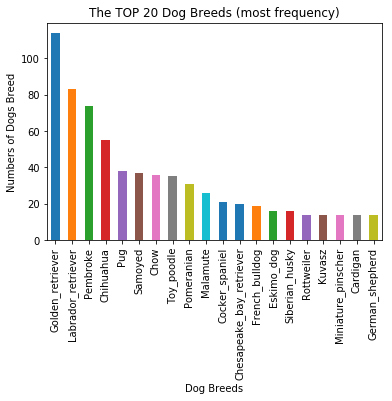

In [87]:
# Generate the bar chart to show each number of dog breed
twitter_archive_master.pred_breed.value_counts()[0:20].plot('bar')
# Set title and x, y label
plt.title('The TOP 20 Dog Breeds (most frequency)')
plt.xlabel('Dog Breeds')
plt.ylabel('Numbers of Dogs Breed')

Text(0,0.5,'Number of Dogs')

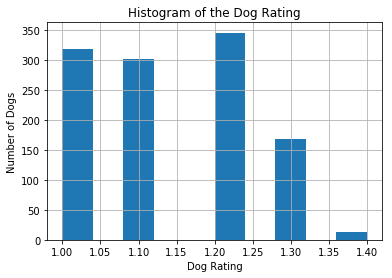

In [88]:
# Generate the histogram of the rating distribution
twitter_archive_master['rating'].hist()
# Set title and x, y label
plt.title('Histogram of the Dog Rating')
plt.xlabel('Dog Rating')
plt.ylabel('Number of Dogs')

Text(0,0.5,'Rating Numerator (Rating Denominator is 10)')

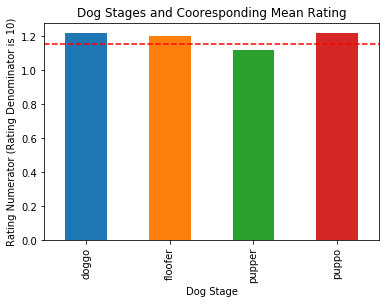

In [89]:
# Mean rating value for not none value in the stage column
mean_rating_no_none_stage = twitter_archive_master.query('dog_stage!="None"')['rating'].mean()
# Generate the bar chart to show each stage's mean rating (where stage is not none)
twitter_archive_master.query('dog_stage!="None"').groupby('dog_stage')['rating'].mean().plot('bar')
# Set horizontal line to indicate the mean rating value for not none value in the stage column
plt.axhline(y=mean_rating_no_none_stage,color='r', linestyle='--', label='mean rating')
# Set title and x, y label
plt.title('Dog Stages and Cooresponding Mean Rating')
plt.xlabel('Dog Stage')
plt.ylabel('Rating Numerator (Rating Denominator is 10)')

Text(0,0.5,'Mean of the Retweet Counts')

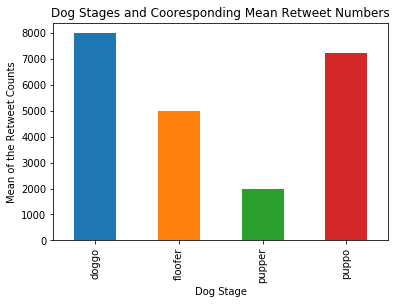

In [90]:
# Generate the bar chart to show the reteet number of each stage (where stage value is not none)
twitter_archive_master.query('dog_stage!="None"').groupby('dog_stage')['retweet_count'].mean().plot('bar')
# Set title and x, y label
plt.title('Dog Stages and Cooresponding Mean Retweet Numbers')
plt.xlabel('Dog Stage')
plt.ylabel('Mean of the Retweet Counts')

Text(0,0.5,'Mean of the Favorite Number')

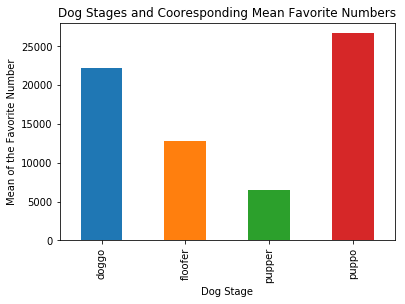

In [91]:
# Generate the bar chart to show the favorite number of each stage (where stage value is not none)
twitter_archive_master.query('dog_stage!="None"').groupby('dog_stage')['favorite_count'].mean().plot('bar')
# Set title and x, y label
plt.title('Dog Stages and Cooresponding Mean Favorite Numbers')
plt.xlabel('Dog Stage')
plt.ylabel('Mean of the Favorite Number')

Text(0,0.5,'Mean of the Ratings')

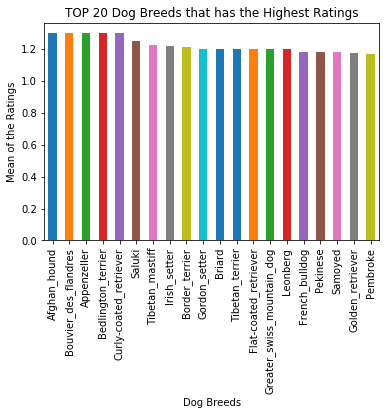

In [92]:
# Get top 20 dog breeds that have the highest rating
rating_top_20 = twitter_archive_master.groupby('pred_breed').rating.mean().sort_values(ascending=False)[0:20]
# Generate the bar chart
rating_top_20.plot('bar')
# Set title and x, y label
plt.title('TOP 20 Dog Breeds that has the Highest Ratings')
plt.xlabel('Dog Breeds')
plt.ylabel('Mean of the Ratings')

Text(0,0.5,'Mean of the Retweet Numbers')

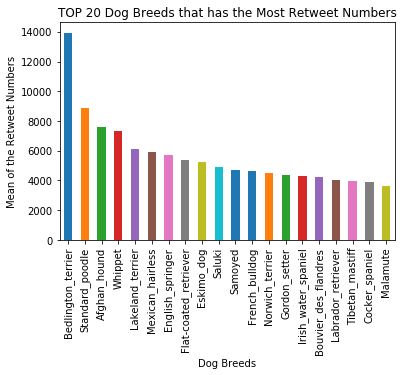

In [93]:
# Get top 20 dog breeds that have the most retweet numbers
retweet_breed_20 = twitter_archive_master.groupby('pred_breed').retweet_count.mean().sort_values(ascending=False)[0:20]
# Generate the bar chart
retweet_breed_20.plot('bar')
# Set title and x, y label
plt.title('TOP 20 Dog Breeds that has the Most Retweet Numbers')
plt.xlabel('Dog Breeds')
plt.ylabel('Mean of the Retweet Numbers')

Text(0,0.5,'Mean of the Favorite Numbers')

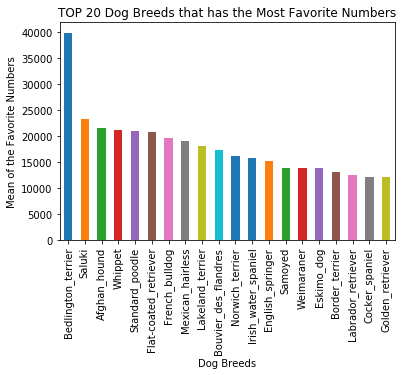

In [94]:
# Get top 20 dog breeds that have the most favorite numbers
favorite_breed_20 = twitter_archive_master.groupby('pred_breed').favorite_count.mean().sort_values(ascending=False)[0:20]
# Generate the bar chart
favorite_breed_20.plot('bar')
# Set title and x, y label
plt.title('TOP 20 Dog Breeds that has the Most Favorite Numbers')
plt.xlabel('Dog Breeds')
plt.ylabel('Mean of the Favorite Numbers')

Text(0,0.5,'Mean of Predition Scores (0-1)')

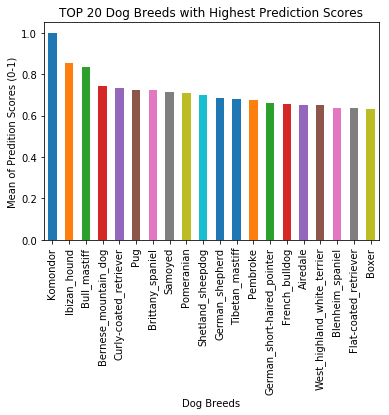

In [95]:
# Get the top 20 dog breeds that can be recognized easily by AI
pred_score_20 = twitter_archive_master.groupby('pred_breed').pred_score.mean().sort_values(ascending=False)[0:20]
# Generate the bar chart
pred_score_20.plot('bar')
# Set title and x, y label
plt.title('TOP 20 Dog Breeds with Highest Prediction Scores')
plt.xlabel('Dog Breeds')
plt.ylabel('Mean of Predition Scores (0-1)')

In [96]:
# Show all tweets' source
twitter_archive_master.source.value_counts()

Twitter for iPhone    1126
Twitter Web Client      14
TweetDeck                8
Name: source, dtype: int64

Text(0,0.5,'Mean Predition Precision')

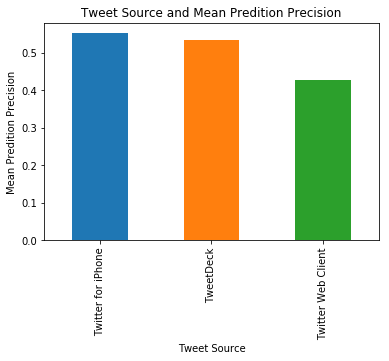

In [97]:
# Check relationship between tweet source and the predition precision
source_pred_rank = twitter_archive_master.groupby('source').pred_score.mean().sort_values(ascending=False)
# Generate bar chart 
source_pred_rank.plot('bar')
# Set title and x, y label
plt.title('Tweet Source and Mean Predition Precision')
plt.xlabel('Tweet Source')
plt.ylabel('Mean Predition Precision')